# Assignement Recommendation Engine

Build a recommendation system using cosine similarity

In [1]:
import pandas as pd

book = pd.read_csv('book.csv', encoding='latin-1')
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [9]:
# rename the columns
lst = list(book.columns)

lst


['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating']

In [10]:
book.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
book.rename(columns={'User.ID':'Title'}, inplace=True)
book.rename(columns={'Book.Title':'User'}, inplace=True)
book.rename(columns={'Book.Rating':'Rating'}, inplace=True)

book.shape

(10000, 4)

# Exploratory analysis: Average Rating by Users

In [13]:
book.describe()

,ID,Title,Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [14]:
book['Rating'].describe()

count    10000.00000
mean         7.56630
std          1.82152
min          1.00000
25%          7.00000
50%          8.00000
75%          9.00000
max         10.00000
Name: Rating, dtype: float64

In [17]:
book.Rating.max()

10

Text(0.5, 1.0, 'Frequency of user rating')

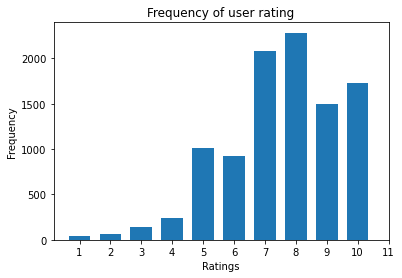

In [22]:
import matplotlib.pyplot as plt
data = book['Rating']
bins = [1,2,3,4,5,6,7,8,9,10,11]

plt.hist(data, bins, align="left", rwidth=0.7)
plt.xticks(bins)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title("Frequency of user rating")

As we see, most users provided pretty positive ratings on books, with the most frequent rating being 8 and average was 7.5